# 클래스공부 7단계

> 함수형 프로그래밍, callable object, 파이썬의 비밀

# imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 함수공부

`-` 다시 함수를 공부해봅시다.

In [2]:
def f(x):
    return x+1

In [4]:
f(3)

4

`-` 함수의 사용방법?

- 입력으로 변수 x를 받음 = 입력으로 인스턴스 x를 받음

- 출력으로 변수 x+1을 리턴 = 출력으로 인스턴스 x+1을 리턴

`-` 사실1: 파이썬에서는 함수는 인스턴스를 입력으로 받고 인스턴스를 출력한다.

`-` 함수의 자료형?

In [5]:
?f

Signature: f(x)
Docstring: <no docstring>
File:      ~/Dropbox/Quarto-Blog/posts/Python/<ipython-input-2-9897bae5f29b>
Type:      function

- type이 function이다.
- f는 function class의 instance이다.
- 결국 f 역시 하나의 오브젝트에 불과하다.

`-` 사실2: 함수도 결국 인스턴스이다. $\to$ 함수의 입력으로 함수를 쓸 수도 있고 함수의 출력으로 함수가 나올 수도 있다.

# 함수형 프로그래밍

***함수도 결국 오브젝트에 불과하다***

## (예제1) 숫자입력, 함수출력

In [6]:
def f(a):
    def _f(x):
        return (x-a)**2
    return _f

In [7]:
g = f(10) # g(x) = (x-10)**2

In [8]:
g(2) # (2-10)**2 = 64

64

- 해석: $f(a)$는 $a$를 입력으로 받고 $g(x)=(x-a)^2$를 함수를 리턴해주는 함수

## (예제1)의 다른 표현: 익명함수 `lambda`

#### 표현1

In [9]:
def f(a):
    _f = lambda x: (x-a)**2 ### lambda x: (x-a)**2 가 실행되는 순간 함수오브젝트가 만들어지고 그것이 _f 로 저장됨 
    return _f

In [10]:
g = f(10) # g(x) = (x-10)**2

In [11]:
g(3)

49

#### 표현2

In [12]:
def f(a):
    return lambda x: (x-a)**2

In [13]:
g = f(10)

In [18]:
g(3)

49

- `lambda x: (x-a)**2`는 $\text{lambda}(x) = (x-a)^2$의 느낌으로 기억하면 외우기 쉽다.

- `lambda x: (x-a)**2`는 "아직 이름이 없는 함수 오브젝트를 (가칭 lambda라고 하자) 만들고 기능은 x를 입력으로 하고 (x-2)**2를 출력하도록 하자" 라는 뜻으로 해석하면 된다.

## (예제2) 함수입력, 숫자출력

In [19]:
def f(x):
    return x**2

In [20]:
def d(f,x): # 함수를 입력을 받는 함수를 정의
    h=0.000000000001
    return (f(x+h)-f(x))/h 

$$f'(x)\approx \frac{f(x+h)-f(x)}{h}$$

- $h$의 값이 점점 0에 가까울수록 등호에 가까워짐.

In [22]:
d(f,4) # f'(4) = 2*4 = 8

8.000711204658728

## (예제3) 함수입력, 함수출력

In [23]:
def f(x): 
    return x**2 

In [24]:
def derivate(f): 
    def df(x): 
        h=0.000000000001
        return (f(x+h)-f(x))/h 
    return df

In [25]:
ff = derivate(f)

In [26]:
ff(7) # f의 도함수

14.004797321831575

**원래함수 시각화**

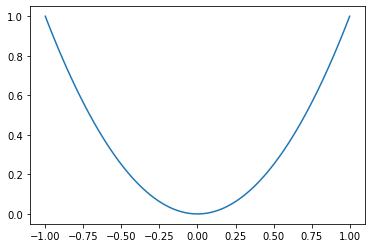

In [30]:
x = np.linspace(-1,1,100)
plt.plot(x,f(x))

**도함수 시각화**

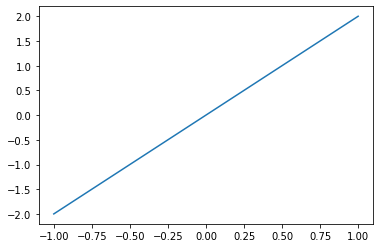

In [32]:
x = np.linspace(-1,1,100)
plt.plot(x, ff(x))

## (예제3)의 다른 표현

In [33]:
def f(x): 
    return x**2

In [34]:
def derivate(f): 
    h=0.000000000001
    return lambda x: (f(x+h)-f(x))/h 

In [36]:
ff = derivate(f)

In [37]:
ff(10)

20.00888343900442

## (예제4) 함수들의 리스트

[오브젝트, 오브젝트, 오브젝트]

In [41]:
flst = [lambda x: x, lambda x: x**2, lambda x: x**3]  # [함수오브젝트,함수오브젝트,함수오브젝트]
flst # 이것의 타입은 function

[<function __main__.<lambda>(x)>,
 <function __main__.<lambda>(x)>,
 <function __main__.<lambda>(x)>]

In [42]:
for f in flst:
    print(f(2))

2
4
8


- 첫번째 함수에 적용될 때는 2출력, 2번째 함수에 적용될 때는 4출력, 3번째 함수에 적용될 때는 8출력

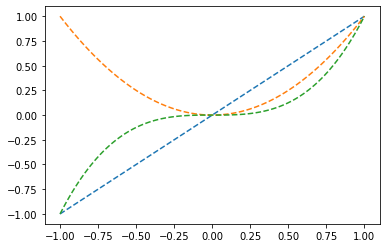

In [43]:
for f in flst:
    plt.plot(x,f(x),'--')

위의 코드는 아래와 같음.

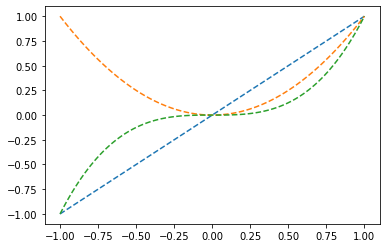

In [49]:
plt.plot(x, (lambda x: x)(x),'--')
plt.plot(x, (lambda x: x**2)(x),'--')
plt.plot(x, (lambda x: x**3)(x),'--')

# 정리

`-` 지금까지 개념

- 함수: 변수를 입력으로 받아서 변수를 출력하는 개념
- 변수: 어떠한 값을 저장하는 용도로 쓰거나 함수의 입력 혹은 출력으로 사용함

`-` 파이썬의 함수형 프로그래밍을 잘하려면? (객체지향적 언어의특징)

- 변수든 함수든 둘 다 인스턴스임.
- 변수를 함수처럼: 메소드
- 함수를 변수처럼($\star$): 함수자체를 함수의 입력으로 혹은 출력으로 쓸 수도 있음. 함수를 특정 값처럼 생각해서 함수들의 list를 만들 수도 있었다.

# callable object

`-` 함수 오브젝트의 비밀?

In [50]:
f = lambda x: x+1 

In [52]:
f

<function __main__.<lambda>(x)>

In [57]:
set(dir(f)) & {'__call__'} ## 여기에는 __call__이 있음.

{'__call__'}

In [54]:
lst = [1,2,3] 

In [58]:
set(dir(lst)) & {'__call__'} ## 여기에는 __call__이 없음.

set()

`-` 함수 오브젝트에는 숨겨진 기능 `__call__`이 있다.

In [59]:
f.__call__(3) # f(3)

4

In [60]:
f.__call__(4) # f(4)

5

- 여기에 우리가 정의한 내용이 있다.

`-` 함수처럼 쓸 수 없는 인스턴스는 단지 call이 없는 것일 뿐이다.

In [64]:
class Klass:
    def __init__(self):
        self.name='jordy'

In [65]:
a = Klass()

In [66]:
a()

TypeError: 'Klass' object is not callable

- a는 callable이 아니라고 한다.

In [70]:
class Klass2(Klass): # 상속
    def __call__(self):
        print(self.name)

In [71]:
b = Klass2()

In [72]:
b()

jordy


- b는 callable object! 즉, 숨겨진 메소드로 `__call__`를 가진 오브젝트

- Klass는 callable object를 만들지 못하지만 Klass2는 callable object를 만든다.

`-` 클래스로 함수를 만들기

In [73]:
class AddConstant:
    def __init__(self,c):
        self.c = c
    def __call__(self,a):
        return a + self.c

In [74]:
f = AddConstant(3) # callable object생성, f.c에는 3이 저장되어있음.

In [76]:
f(5) # f.c와 5를 더하는 기능을 수행, # f(x) = x+3을 수행함.

8

In [77]:
f(10)

13

`-` 클래스도 그러고보니까 `오브젝트` 아니었나? 클래스도 함수처럼 `Klass()`와 같이 사용하면 인스턴스를 만들었음. $\to$ `Klass.__call__()`은 `Klass()`와 같은 역할을 할 것이다.

In [79]:
class Klass:
    def __init__(self):
        self.name = 'chunsik'

In [80]:
a = Klass.__call__() # 이것이 a=Klass()와 같은 효과

In [81]:
a.name

'chunsik'

# 파이썬의 비밀 1~4

- 파이썬의 비밀1: 자료형은 클래스의 이름이다.
- 파이썬의 비밀2: 클래스에는 `__str__` 처럼 숨겨진 매서드가 존재한다. 이를 이용하여 파이썬 내부의 기능을 가로챌 수 있다.
- 파이썬의 비밀3: 주피터노트북(대화형 콘솔)에서는 "오브젝트이름 + 엔터"를 쳐서 나오는 출력은 `__repr__`로 가로챌 수 있다. (주피터의 비밀)
- 파이썬의 비밀4: 함수와 클래스는 숨겨진 메소드에 `__call__`을 가진 오브젝트일 뿐이다.
- 파이썬의 비밀5: **NEXT** (클래스공부 8단계에서)